# K Nearest Neighbors Project 


## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
KNN = pd.read_csv("KNN_Project_Data", index_col = 0)

**Check the head of the dataframe.**

In [3]:
KNN.head()

GWYH         TRAT        TLLZ         IGGA         HYKR  \
XVPM                                                                          
1636.670614   817.988525  2565.995189  358.347163   550.417491  1618.870897   
1013.402760   577.587332  2644.141273  280.428203  1161.873391  2084.107872   
1300.035501   820.518697  2025.854469  525.562292   922.206261  2552.355407   
1059.347542  1066.866418   612.000041  480.827789   419.467495   685.666983   
1018.340526  1313.679056   950.622661  724.742174   843.065903  1370.554164   

                    EDFS        GUUB         MGJM         JHZC  TARGET CLASS  
XVPM                                                                          
1636.670614  2147.641254  330.727893  1494.878631   845.136088             0  
1013.402760   853.404981  447.157619  1193.032521   861.081809             1  
1300.035501   818.676686  845.491492  1968.367513  1647.186291             1  
1059.347542   852.867810  341.664784  1154.391368  1450.935357             0  
1018.340526   905.469453  658.118202   539.459350  1899.850792             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

C:\Users\Processos04\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Processos04\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Processos04\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Processos04\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

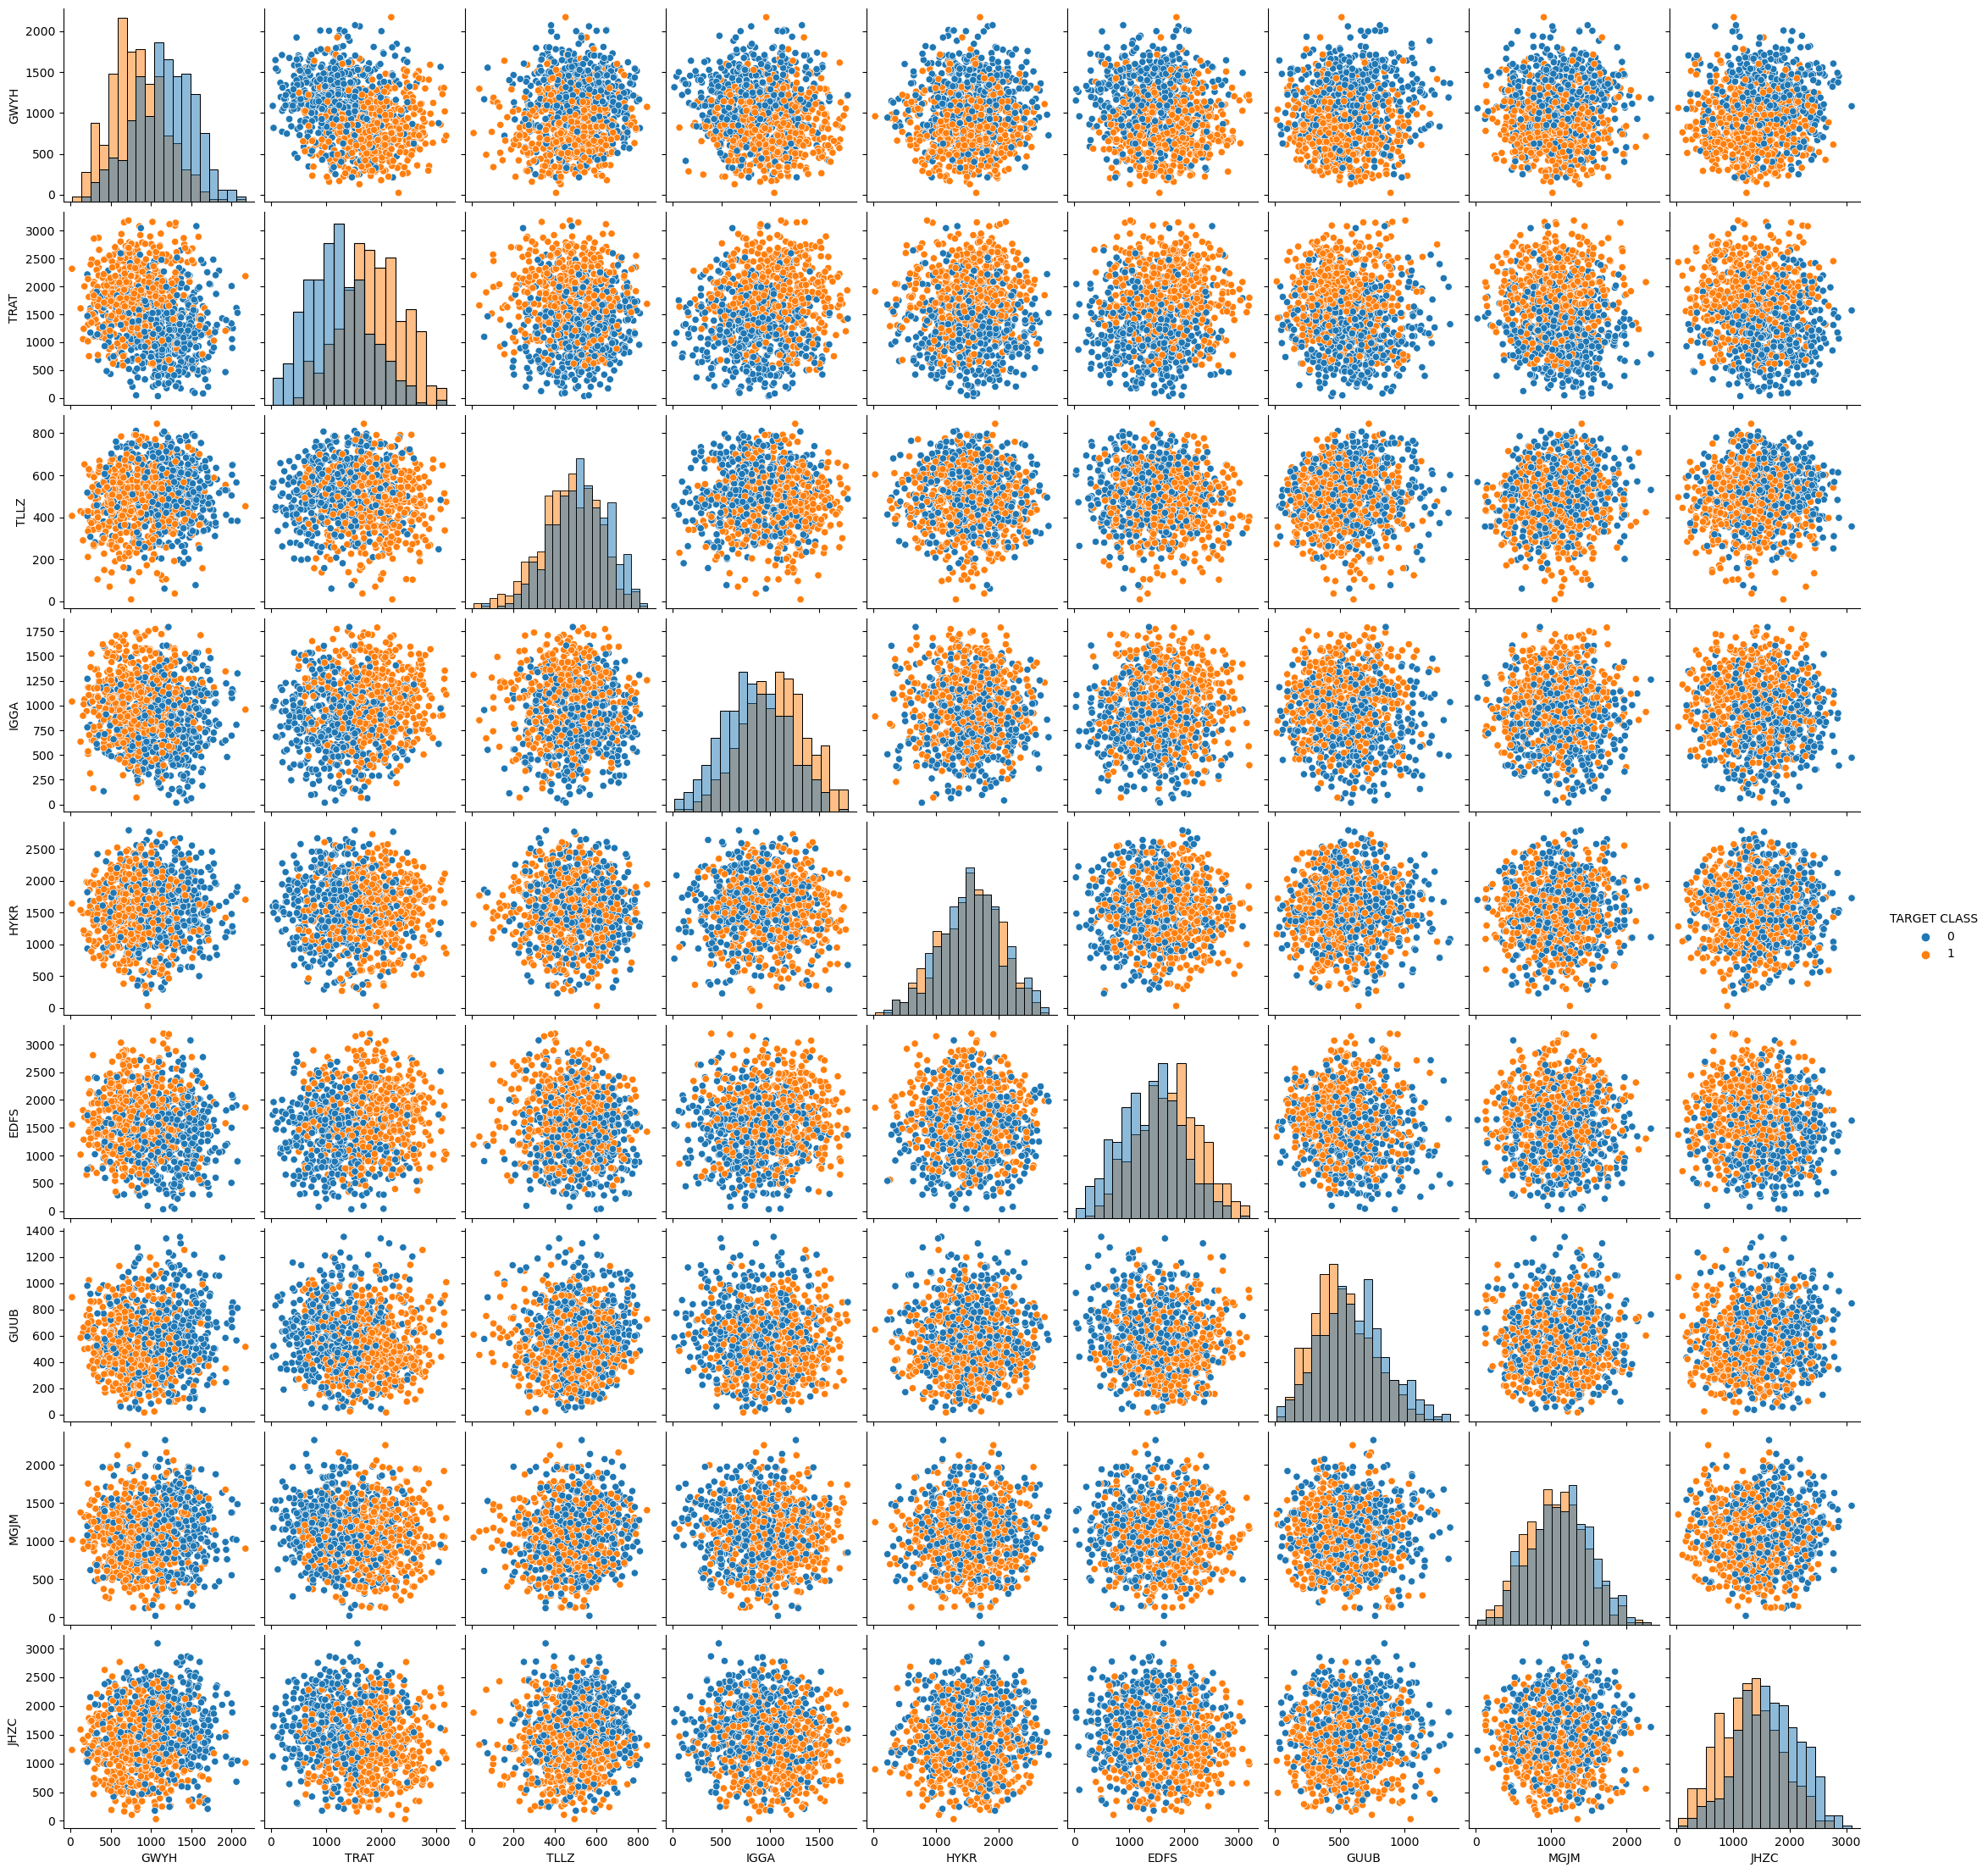

In [4]:
sns.pairplot(KNN, hue = 'TARGET CLASS', diag_kind='hist')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**
** Explain this feature **

In [5]:
from sklearn.preprocessing import StandardScaler
# ele centralza a distribuição de caracteristicas e faz com que o desvião padrão fique em 1

** Create a StandardScaler() object called scaler.**

In [6]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [7]:
scaler.fit(KNN.drop('TARGET CLASS', axis = 1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

#### Explain what tranform() function method does in this step 

In [8]:
KNN_scaled = scaler.transform(KNN.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [9]:
KNN.head()


GWYH         TRAT        TLLZ         IGGA         HYKR  \
XVPM                                                                          
1636.670614   817.988525  2565.995189  358.347163   550.417491  1618.870897   
1013.402760   577.587332  2644.141273  280.428203  1161.873391  2084.107872   
1300.035501   820.518697  2025.854469  525.562292   922.206261  2552.355407   
1059.347542  1066.866418   612.000041  480.827789   419.467495   685.666983   
1018.340526  1313.679056   950.622661  724.742174   843.065903  1370.554164   

                    EDFS        GUUB         MGJM         JHZC  TARGET CLASS  
XVPM                                                                          
1636.670614  2147.641254  330.727893  1494.878631   845.136088             0  
1013.402760   853.404981  447.157619  1193.032521   861.081809             1  
1300.035501   818.676686  845.491492  1968.367513  1647.186291             1  
1059.347542   852.867810  341.664784  1154.391368  1450.935357             0  
1018.340526   905.469453  658.118202   539.459350  1899.850792             0

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(KNN_scaled,KNN['TARGET CLASS'],test_size=0.30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [15]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[ 97  47]
 [ 34 122]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71       144
           1       0.72      0.78      0.75       156

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [21]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

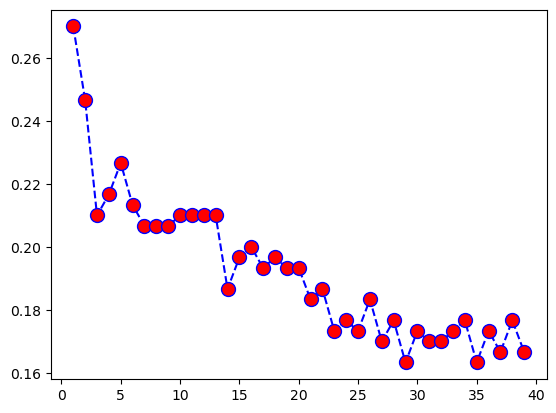

In [22]:
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [23]:
#K=18
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[115  29]
 [ 30 126]]


              precision    recall  f1-score   support

           0       0.79      0.80      0.80       144
           1       0.81      0.81      0.81       156

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



#### How can you explaing the goodness of this prediction? 

#### Do you have any idea of how KNN is applied in real life?

In [24]:
#essa predição é importante para verificar as massas de dados vizinhas encurtando os caminhos 
#ela pode ser usada em rotas aereas, algoritimos, entre outros...